In [115]:
%matplotlib notebook

import os

from datetime import datetime
from datetime import timedelta
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [116]:
logFolder = 'logs'

fileList = os.listdir(logFolder)

print(fileList)

['Network_26709_20230124.log', 'Network_26709_20230126.log', 'Network_26709_20230127.log', 'Network_26709_20230129.log', 'Network_26709_20230131.log', 'Network_26709_20230202.log', 'Network_26709_20230203.log', 'Network_26709_20230205.log', 'Network_26709_20230207.log', 'Network_26800_20230209.log', 'Network_26800_20230211.log', 'Network_26800_20230212.log', 'Network_26800_20230214.log', 'Network_26800_20230219.log', 'Network_26800_20230220.log', 'Network_26800_20230221.log', 'Network_26800_20230223.log', 'Network_26800_20230224.log', 'Network_26800_20230228.log', 'Network_26800_20230302.log', 'Network_26800_20230303.log', 'Network_26800_20230306.log', 'Network_26801_20230307.log', 'Network_26801_20230309.log', 'Network_26801_20230312.log', 'Network_26801_20230313.log', 'Network_26801_20230314.log', 'Network_26801_20230315.log', 'Network_26801_20230316.log', 'Network_26801_20230317.log']


In [117]:
# fight start and all phase transitions line up perfectly with RP lines, unsure if this happens with other fights
# first entry is None to line up index with phases
# accessed with (row[0] == '00' and row[4] in phaseTransition)
phaseTransition = {
    'None':0,
    'You are the Alpha, I am the Omega. <blip> Initiating direct analysis of subject group.':1,
    'I am the Omega and the Alpha. I will mimic your weakness to comprehend your strength.':2,
    'Evaluation. Imitation of mortal form and behavior provides negligible improvement to combat capabilities.':3,
    '<blip> <bleep> Critical damage detected. Initiating system shutdown...':4,
    'Must evolve...beyond current parameters... I must...see...':5,
    'I am the Omega, and I walk with the Alpha. Where one ends, another begins.':6
}

pullStarted = False
pullCount = 0
logNumber = 0
# raidTime is highly experimental, and requires you to have a new log for each raid day.
raidTime = timedelta(0)
logTime = True

# pull set [[pull number], [pull length], [phase], [phase color]]
pullSet = [[], [], [], []]

In [118]:
for file in fileList:
    if(not logTime):
        logEndTime = pullEndTime
        logLength = logEndTime - logStartTime
        
        print(f'Raid lasted {logLength}')
        raidTime += logLength
        
        logTime = True
    
    with open(f"{logFolder}/{file}", encoding='utf-8') as log:
        # keep track of log number
        logNumber += 1
        print(f"Reading log {logNumber} of {len(fileList)}")
        
        for i, line in enumerate(log):
            row = line.split('|')

            # this if statement only is entered after a wipe/if it's the first pull
            if(not pullStarted):
                # just row[4] isn't enough, some rows don't have 5 elements
                # starts pull
                if(row[0] == '00' and row[4] == list(phaseTransition)[1]):
                    pullStarted = True
                    pullStartTime = datetime.strptime(row[1][:-14], '%Y-%m-%dT%H:%M:%S')
                    
                    # start recording start time of log
                    if(logTime):
                        logStartTime = pullStartTime
                        logTime = False

            if(pullStarted):
                if(row[0] == '00' and row[4] in phaseTransition):
                    # add countermeasure against errant logging by removing pulls with None RP text
                    if(phaseTransition[row[4]] == 0):
                        pullStarted = False
                        
                    pullPhase = phaseTransition[row[4]]

                # 4000000F is a wipe event, ends pull
                if(pullStarted and row[0] == '33' and row[3] == '4000000F'):
                    pullStarted = False

                    pullEndTime = datetime.strptime(row[1][:-14], '%Y-%m-%dT%H:%M:%S')
                    pullLength = pullEndTime - pullStartTime
                    
                    # add countermeasure against errant logging by removing impossibly long phase 1 pulls
                    if(not (pullPhase == 1 and pullLength.total_seconds() > 150)):
                        pullCount += 1

                        # save pull info to pullSet
                        pullSet[0].append(pullCount)
                        pullSet[1].append(pullLength.total_seconds())
                        pullSet[2].append(pullPhase)
                        
                        # redo pullEndTime in case of errant long phase 1 pulls, should normally be redundant 
                        pullEndTime = datetime.strptime(row[1][:-14], '%Y-%m-%dT%H:%M:%S')
                        
# finish last log's time
logEndTime = pullEndTime
logLength = logEndTime - logStartTime
print(f'Raid lasted {logLength}')
raidTime += logLength
        
print(f'Done! Read {pullCount} total pulls in {logNumber} files over {int((raidTime.days*24) + (raidTime.seconds/3600))} hours.')

Reading log 1 of 30
Raid lasted 3:59:08
Reading log 2 of 30
Raid lasted 3:55:32
Reading log 3 of 30
Raid lasted 3:47:56
Reading log 4 of 30
Raid lasted 2:56:31
Reading log 5 of 30
Raid lasted 3:58:25
Reading log 6 of 30
Raid lasted 3:53:37
Reading log 7 of 30
Raid lasted 3:50:40
Reading log 8 of 30
Raid lasted 2:58:09
Reading log 9 of 30
Raid lasted 3:57:38
Reading log 10 of 30
Raid lasted 3:58:51
Reading log 11 of 30
Raid lasted 3:34:55
Reading log 12 of 30
Raid lasted 2:53:34
Reading log 13 of 30
Raid lasted 3:24:26
Reading log 14 of 30
Raid lasted 3:27:04
Reading log 15 of 30
Raid lasted 3:47:33
Reading log 16 of 30
Raid lasted 3:50:06
Reading log 17 of 30
Raid lasted 3:47:43
Reading log 18 of 30
Raid lasted 3:06:20
Reading log 19 of 30
Raid lasted 1:36:33
Reading log 20 of 30
Raid lasted 2:57:59
Reading log 21 of 30
Raid lasted 1:34:34
Reading log 22 of 30
Raid lasted 4:09:53
Reading log 23 of 30
Raid lasted 3:59:35
Reading log 24 of 30
Raid lasted 4:14:00
Reading log 25 of 30
Raid

<IPython.core.display.Javascript object>


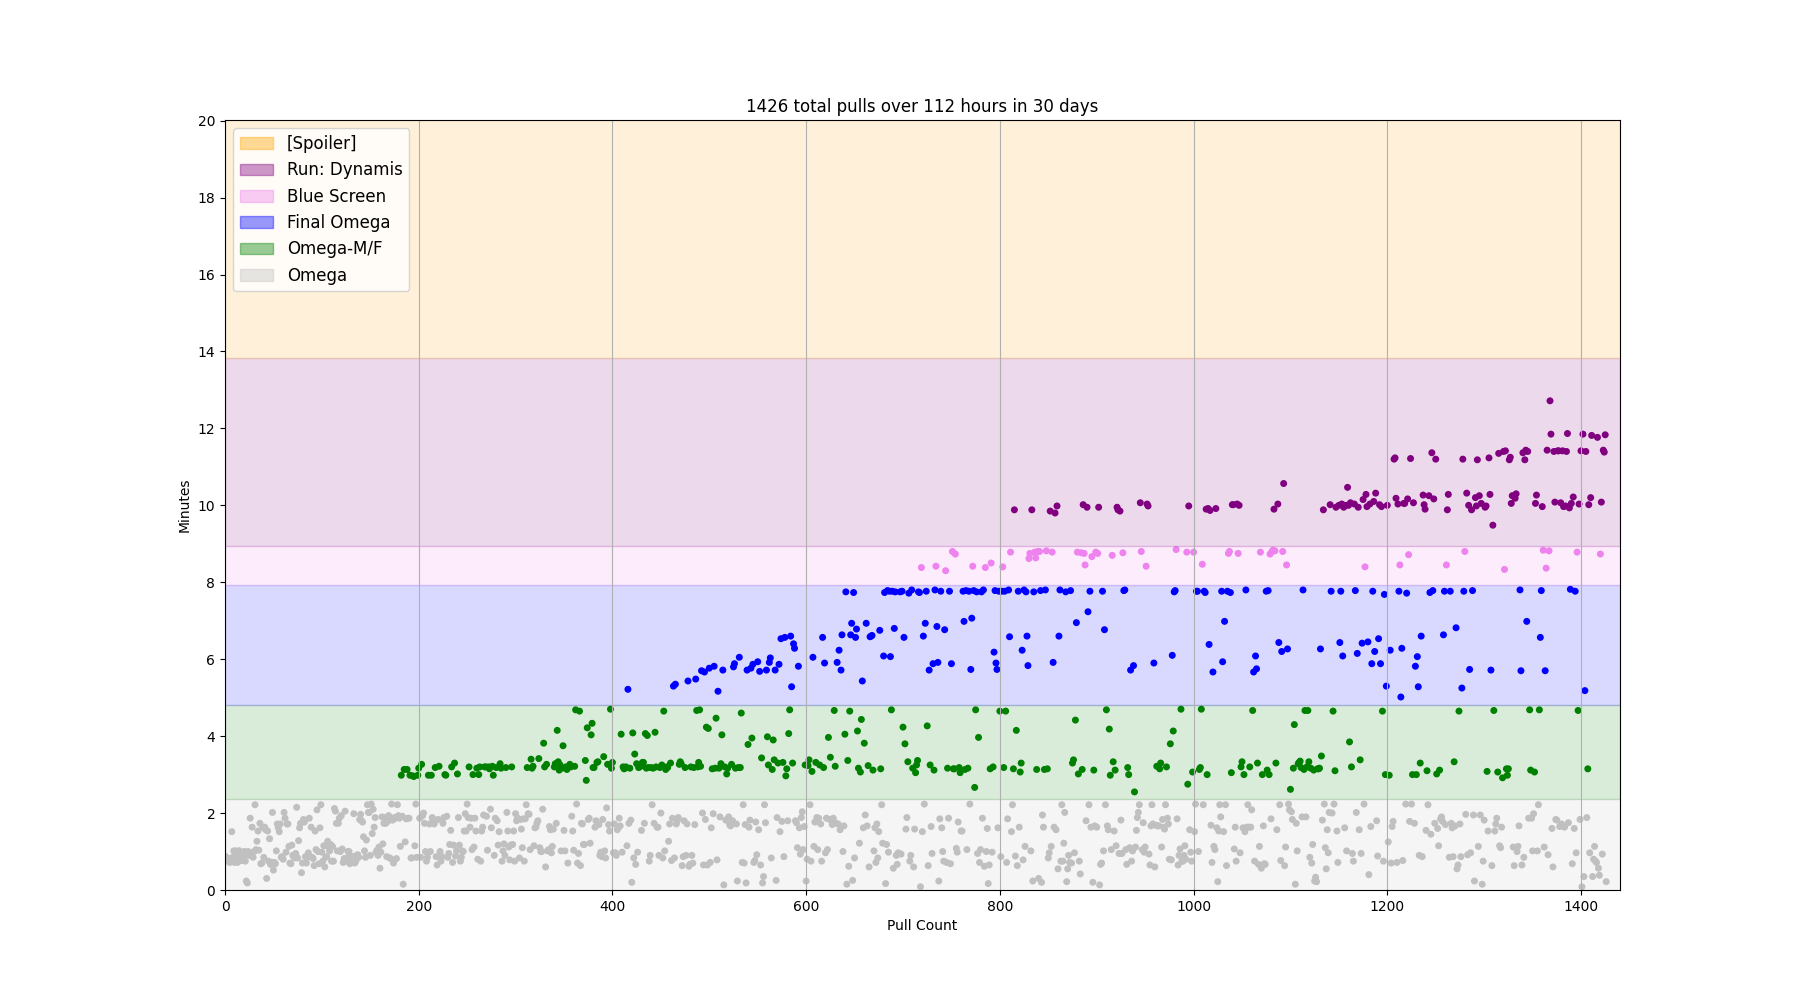

In [121]:
phaseColors = [None, 'silver', 'green', 'blue', 'violet', 'purple', 'orange']
phaseNames = [None, 'Omega', 'Omega-M/F', 'Final Omega', 'Blue Screen', 'Run: Dynamis', '[Spoiler]']
phaseTimings = [0, 142, 288, 475, 537, 830, 1201]

# assign a color for each entry in pullSet
# reset pullSet[3] for ease of debug
pullSet[3] = []
for pullPhase in pullSet[2]:
    pullSet[3].append(phaseColors[pullPhase])
    
    

plt.figure(figsize=(18, 10))
plt.scatter(pullSet[0], pullSet[1], color=pullSet[3], s=16)

plt.xlim(0, len(pullSet[0])*1.01)
plt.ylim(0, 1201)

plt.yticks(np.arange(0, 1201, 120), np.arange(0, 22, 2))

plt.xlabel('Pull Count')
plt.ylabel('Minutes')
plt.title(f'{pullCount} total pulls over {int((raidTime.days*24) + (raidTime.seconds/3600))} hours in {logNumber} days')

# set colors for bands on graph
for i in range(0, 6):
    plt.axhspan(phaseTimings[i], phaseTimings[i+1], color=phaseColors[i+1], alpha=0.15)
    
legendPatches = []
for i in range(1, 7):
    legendPatches.append(mpatches.Patch(color=phaseColors[i], label=phaseNames[i], alpha=0.4))
legendPatches.reverse()

plt.grid(axis='x')
plt.legend(handles=legendPatches, loc=2, fontsize='large')

plt.savefig('graph.jpg')